# Analysis of Trip advisor Customer reviews in White Rock - British Columbia

In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

df = pd.read_csv('reviews.csv',
                          header=None,
                          names=columnNames)
df.tail(50)


,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
1922,data\ca\58359\4563441\728649787.html,Semiahmoo Resort,"""Service was excellent, cause we needed a few...",5,positive,"November 24, 2019",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1923,data\ca\58359\4563441\729038755.html,Semiahmoo Resort,"""A group of us came out here for a birthday pa...",5,positive,"November 26, 2019",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1924,data\ca\58359\4563441\730344166.html,Semiahmoo Resort,"""My family and I love this resort!!!\nThe driv...",5,positive,"December 2, 2019",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1925,data\ca\58359\4563441\730790777.html,Semiahmoo Resort,"""Amazing place. Nice and clean room. Lots of a...",5,positive,"December 5, 2019",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1926,data\ca\58359\4563441\730829378.html,Semiahmoo Resort,"""Semiahmoo Resort provides beautiful views of ...",4,positive,"December 5, 2019",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1927,data\ca\58359\4563441\735703018.html,Semiahmoo Resort,"""What a wonderful way to enjoy a holiday weeke...",5,positive,"December 30, 2019",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1928,data\ca\58359\4563441\736030572.html,Semiahmoo Resort,"""NYE 2019- this resort of amazing! This is our...",5,positive,"January 1, 2020",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1929,data\ca\58359\4563441\736588736.html,Semiahmoo Resort,"""For the price you pay per night, I would expe...",3,negative,"January 3, 2020",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1930,data\ca\58359\4563441\736606854.html,Semiahmoo Resort,"""Our room smelled of urine and the shower curt...",1,negative,"January 3, 2020",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326
1931,data\ca\58359\4563441\737364899.html,Semiahmoo Resort,"""I really enjoy this resort. It is family fri...",5,positive,"January 6, 2020",9565 Semiahmoo Pkwy,Blaine,Washington,98230-9326


# Getting top hotels in the city by the no of reviews in each

In [ ]:
df['hotelName'].value_counts()

Best Western Plus Langley Inn                              100
Best Western King George Inn &amp; Suites                  100
Travelodge by Wyndham Langley                              100
Coast Langley City Hotel &amp; Convention Centre           100
Comfort Inn &amp; Suites Surrey                            100
Holiday Inn Hotel &amp; Suites Surrey East - Cloverdale    100
Sandman Signature Langley Hotel                            100
Holiday Inn Express &amp; Suites Surrey                    100
Ocean Promenade Hotel                                      100
Ramada by Wyndham Surrey/Langley                           100
Days Inn &amp; Suites by Wyndham Langley                   100
Semiahmoo Resort                                           100
Hampton Inn &amp; Suites Langley Surrey                    100
Best Western Peace Arch Inn                                100
Sheraton Vancouver Guildford Hotel                         100
Sandcastle at Birch Bay                                

In [ ]:
#Searching for hotels with more than 10 reviews
grouped=df.groupby('hotelName').count()
grouped=grouped[grouped['reviewColumn']>10]
grouped=grouped.reset_index()
hotels=grouped['hotelName'].values
hotels

array(['Beach Grove Motel', 'Best Western King George Inn &amp; Suites',
       'Best Western Peace Arch Inn', 'Best Western Plus Langley Inn',
       'Canadian Inn', 'Civic Hotel, Autograph Collection',
       'Coast Langley City Hotel &amp; Convention Centre',
       'Comfort Inn &amp; Suites Surrey',
       'Days Inn &amp; Suites by Wyndham Langley',
       'Four Points by Sheraton Surrey',
       'Hampton Inn &amp; Suites Langley Surrey',
       'Holiday Inn Express &amp; Suites Surrey',
       'Holiday Inn Hotel &amp; Suites Surrey East - Cloverdale',
       'Linda Vista Motel', 'Ocean Promenade Hotel',
       'Ocean Rose Bed And Breakfast', 'Princess and the Pea Hotel',
       'Ramada by Wyndham Surrey/Langley', 'Sandcastle at Birch Bay',
       'Sandman Signature Langley Hotel', 'Semiahmoo Resort',
       'Sheraton Vancouver Guildford Hotel', 'Star of the Sea B&amp;B',
       'Travelodge by Wyndham Langley', 'Westward Inn &amp; Suites'],
      dtype=object)

In [ ]:
#Removing hotels with less than 10 reviews
df=df[df['hotelName'].isin(hotels)]
df['reviewColumn'] = df['reviewColumn'].str.replace('\d+', '')
df=df.reset_index(drop=True)
df

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data\ca\154949\182634\114583513.html,Ocean Rose Bed And Breakfast,"""Great service, room was cleaned and snacks le...",5,positive,"June 20, 2011",14466 Sunset Dr,White Rock,British Columbia,V4B 2V8
1,data\ca\154949\182634\114773048.html,Ocean Rose Bed And Breakfast,"""This B&B is just one unit, comprised of a pat...",5,positive,"June 26, 2011",14466 Sunset Dr,White Rock,British Columbia,V4B 2V8
2,data\ca\154949\182634\115343655.html,Ocean Rose Bed And Breakfast,"""We had a warm welcome from David. The apartme...",4,positive,"July 13, 2011",14466 Sunset Dr,White Rock,British Columbia,V4B 2V8
3,data\ca\154949\182634\115998418.html,Ocean Rose Bed And Breakfast,"""Brilliant location, fabulous hosts and great ...",5,positive,"July 29, 2011",14466 Sunset Dr,White Rock,British Columbia,V4B 2V8
4,data\ca\154949\182634\117635407.html,Ocean Rose Bed And Breakfast,"""The suite was comfortable and had all the nic...",5,positive,"September 3, 2011",14466 Sunset Dr,White Rock,British Columbia,V4B 2V8
...,...,...,...,...,...,...,...,...,...,...
1915,data\ca\678579\249421\696663487.html,Beach Grove Motel,"""The only thing great about this hotel is the ...",1,negative,"August 7, 2019",5921 12 Ave,Tsawwassen,British Columbia,V4L 1C6
1916,data\ca\678579\249421\697588222.html,Beach Grove Motel,"""This hotel is badly in need of care and major...",2,negative,"August 10, 2019",5921 12 Ave,Tsawwassen,British Columbia,V4L 1C6
1917,data\ca\678579\249421\698957368.html,Beach Grove Motel,"""We needed a place to stay last minute and thi...",4,positive,"August 14, 2019",5921 12 Ave,Tsawwassen,British Columbia,V4L 1C6
1918,data\ca\678579\249421\718066241.html,Beach Grove Motel,"""I wish I had not paid so I could pack up and ...",1,negative,"October 13, 2019",5921 12 Ave,Tsawwassen,British Columbia,V4L 1C6


Here I removed the places with lower than 10 reviews as such a low no of reviews will give inaccurate results.

In [ ]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [ ]:
def get_stop_words():
    exclude = ['not', 'against']               #Excluded stop words like not and against since they would be helpful in sentiment analysis
    stop = set(stopwords.words('english')).difference(exclude)
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    stop.add('would')
    stop.add('stayed')
    stop.add('stay')
    stop.add('night')
    stop.add('vancouver')
    stop.add('white')
    stop.add('rock')
    stop.add('day')
    stop.add('staff')
    stop.add('breakfast')
    stop.add('food')
    stop.add('bed')
    stop.add('one')
    stop.add('restaurant')
    stop.add('also')
    stop.add('desk')
    stop.add('reception')
    stop.add('service')
    stop.add('location')
    stop.add('front')
    stop.add('get')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values
    #Used lemmatization and NLTK tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    for review in reviews:
      #review = re.sub(r'\d+', '', review)
      counter.update([lemmatizer.lemmatize(word.lower())
                            for word 
                            in tokenizer.tokenize(review) 
                            if lemmatizer.lemmatize(word.lower()) not in stop and len(lemmatizer.lemmatize(word.lower())) > 2])
    topk = counter.most_common(kwords)
    return topk

# Note: Used NLTK tokenizer in the following
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([lemmatizer.lemmatize(word.lower())for word in tokenizer.tokenize(reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf


Here I excluded the stop words and also used lemmitization so that the data becomes more uniform and only the important words are kept.

In [ ]:
reviews = df['reviewColumn'].values

In [ ]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 1920/1920 [00:02<00:00, 929.18it/s]


In [ ]:
topk = getTopKWords(reviewDF, 500)
finaldf = dataFrameTransformation(df, reviewDF, topk)

In [ ]:
topk[:20]

[('not', 1075),
 ('clean', 971),
 ('great', 951),
 ('good', 815),
 ('nice', 656),
 ('friendly', 647),
 ('comfortable', 547),
 ('time', 543),
 ('well', 512),
 ('area', 501),
 ('place', 459),
 ('helpful', 354),
 ('back', 345),
 ('pool', 336),
 ('parking', 327),
 ('nthe', 322),
 ('like', 317),
 ('check', 314),
 ('lot', 306),
 ('could', 279)]

In [ ]:
finaldf.iloc[1800:]

,hotelName,ratingScore,groundTruth,reviewCol,vader,not,clean,great,good,nice,friendly,comfortable,time,well,area,place,helpful,back,pool,parking,nthe,like,check,lot,could,next,really,view,close,family,recommend,even,hot,best,two,need,quiet,suite,free,small,...,semiahmoo,rest,bus,separate,kitchenette,including,tried,least,clerk,renovated,fee,key,bag,sofa,entire,sandman,immediately,nthere,facing,pub,either,probably,whole,case,type,beyond,furniture,meeting,wally,accommodation,airport,spend,decor,behind,reason,screen,seattle,fan,stop,move
1800,Semiahmoo Resort,5,positive,"""This resort offers all you would need or want...",0.9579,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1801,Semiahmoo Resort,5,positive,"""A beautiful setting with wonderful staff and ...",0.9796,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1802,Semiahmoo Resort,5,positive,"""My husband and I had a wonderful stay at Semi...",0.9823,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1803,Semiahmoo Resort,4,positive,"""I was looking to relax and have a nice stay w...",0.9628,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1804,Semiahmoo Resort,2,negative,"""Whoever is in charge of room service needs to...",-0.5661,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,Beach Grove Motel,1,negative,"""The only thing great about this hotel is the ...",-0.7787,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1916,Beach Grove Motel,2,negative,"""This hotel is badly in need of care and major...",-0.1081,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1917,Beach Grove Motel,4,positive,"""We needed a place to stay last minute and thi...",0.9674,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1918,Beach Grove Motel,1,negative,"""I wish I had not paid so I could pack up and ...",-0.6639,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Calculating the Rating score and Vader Score

In [ ]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean'})
  return tempDf

In [ ]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df

,AverageVader,AverageRatingScore
hotelName,,
Beach Grove Motel,0.277770,2.500000
Best Western King George Inn &amp; Suites,0.870324,4.620000
Best Western Peace Arch Inn,0.702477,3.990000
Best Western Plus Langley Inn,0.786356,4.420000
Canadian Inn,0.147757,2.380952
"Civic Hotel, Autograph Collection",0.531264,3.844444
Coast Langley City Hotel &amp; Convention Centre,0.718642,4.260000
Comfort Inn &amp; Suites Surrey,0.731879,3.950000
Days Inn &amp; Suites by Wyndham Langley,0.774839,4.230000


In [ ]:
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].head(5)
avgRatingTop5

,hotelName,AverageRatingScore
16,Princess and the Pea Hotel,4.866667
15,Ocean Rose Bed And Breakfast,4.833333
22,Star of the Sea B&amp;B,4.700000
1,Best Western King George Inn &amp; Suites,4.620000
10,Hampton Inn &amp; Suites Langley Surrey,4.560000


In [ ]:
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].head(5)
avgVaderTop5

,hotelName,AverageVader
22,Star of the Sea B&amp;B,0.927210
15,Ocean Rose Bed And Breakfast,0.905830
1,Best Western King George Inn &amp; Suites,0.870324
16,Princess and the Pea Hotel,0.868393
10,Hampton Inn &amp; Suites Langley Surrey,0.864635


In [ ]:
avgRatingbottom5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=True)[['hotelName','AverageRatingScore']].head(5)
avgRatingbottom5 

,hotelName,AverageRatingScore
13,Linda Vista Motel,1.375000
4,Canadian Inn,2.380952
0,Beach Grove Motel,2.500000
23,Travelodge by Wyndham Langley,3.700000
14,Ocean Promenade Hotel,3.800000


In [ ]:
avgVaderbottom5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=True)[['hotelName','AverageVader']].head(5)
avgVaderbottom5

,hotelName,AverageVader
13,Linda Vista Motel,-0.467069
4,Canadian Inn,0.147757
0,Beach Grove Motel,0.277770
5,"Civic Hotel, Autograph Collection",0.531264
14,Ocean Promenade Hotel,0.608122


In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderTop5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingTop5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Top 5 hotels avg rating vs. avg vader score:
+--------+-------------------------------------------+-------------------------------------------+
|   Rank | avg Rating                                | avg Vader                                 |
+========+===========================================+===========================================+
|      0 | Princess and the Pea Hotel                | Star of the Sea B&amp;B                   |
+--------+-------------------------------------------+-------------------------------------------+
|      1 | Ocean Rose Bed And Breakfast              | Ocean Rose Bed And Breakfast              |
+--------+-------------------------------------------+-------------------------------------------+
|      2 | Star of the Sea B&amp;B                   | Best Western King George Inn &amp; Suites |
+--------+-------------------------------------------+-------------------------------------------+
|      3 | Best Western King George Inn &amp; Suites | Princess 

Here we can see that all 5 of the top hotels by avg rating are present in the avg vader telling that the avg rating and avg vader are very similar. In the ranking between the top 5, the ranking of the 1st, 3rd and 4thth are interchanged but all of them are present in both

In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Bottom 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderbottom5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingbottom5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Bottom 5 hotels avg rating vs. avg vader score:
+--------+-------------------------------+-----------------------------------+
|   Rank | avg Rating                    | avg Vader                         |
+========+===============================+===================================+
|      0 | Linda Vista Motel             | Linda Vista Motel                 |
+--------+-------------------------------+-----------------------------------+
|      1 | Canadian Inn                  | Canadian Inn                      |
+--------+-------------------------------+-----------------------------------+
|      2 | Beach Grove Motel             | Beach Grove Motel                 |
+--------+-------------------------------+-----------------------------------+
|      3 | Travelodge by Wyndham Langley | Civic Hotel, Autograph Collection |
+--------+-------------------------------+-----------------------------------+
|      4 | Ocean Promenade Hotel         | Ocean Promenade Hotel             |
+---

Here we can see that 4 of the 5 hotels are present in the bottom 5 hotels. Also, the ranking of all the hotels are exactly similar in both except rank 4 which gives different hotel altogether.

Top K words in these reviews

In [ ]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    for review in reviews:
          counter.update([lemmatizer.lemmatize(word.lower())
                            for word 
                            in tokenizer.tokenize(review) 
                            if lemmatizer.lemmatize(word.lower()) not in stop and len(lemmatizer.lemmatize(word.lower())) > 2])
    topk = counter.most_common(kwords)
    return topk

In [ ]:
topkGroundPos = getTopK(finaldf, 50, label_value='positive')
topkGroundPos

[('great', 849),
 ('clean', 833),
 ('good', 627),
 ('friendly', 570),
 ('nice', 533),
 ('not', 521),
 ('comfortable', 487),
 ('well', 434),
 ('area', 412),
 ('time', 395),
 ('place', 368),
 ('helpful', 324),
 ('pool', 271),
 ('lot', 246),
 ('back', 238),
 ('parking', 238),
 ('nthe', 230),
 ('close', 226),
 ('view', 222),
 ('check', 222),
 ('family', 219),
 ('really', 215),
 ('recommend', 214),
 ('best', 208),
 ('quiet', 204),
 ('next', 195),
 ('like', 193),
 ('always', 192),
 ('excellent', 190),
 ('definitely', 187),
 ('langley', 178),
 ('suite', 176),
 ('hot', 173),
 ('large', 170),
 ('everything', 170),
 ('could', 169),
 ('free', 169),
 ('enjoyed', 158),
 ('little', 157),
 ('right', 153),
 ('coffee', 152),
 ('need', 152),
 ('two', 152),
 ('make', 151),
 ('small', 150),
 ('even', 147),
 ('staying', 139),
 ('wonderful', 137),
 ('price', 137),
 ('surrey', 136)]

In [ ]:
topkGroundNeg = getTopK(finaldf, 50, label_value='negative')
topkGroundNeg

[('not', 554),
 ('good', 188),
 ('time', 148),
 ('clean', 138),
 ('like', 124),
 ('nice', 123),
 ('could', 110),
 ('told', 108),
 ('back', 107),
 ('great', 102),
 ('door', 101),
 ('even', 92),
 ('said', 92),
 ('nthe', 92),
 ('check', 92),
 ('place', 91),
 ('area', 89),
 ('parking', 89),
 ('floor', 86),
 ('never', 82),
 ('got', 80),
 ('two', 79),
 ('need', 78),
 ('well', 78),
 ('friendly', 77),
 ('next', 77),
 ('asked', 75),
 ('morning', 74),
 ('booked', 74),
 ('bathroom', 69),
 ('work', 68),
 ('hot', 65),
 ('small', 65),
 ('pool', 65),
 ('manager', 65),
 ('still', 65),
 ('guest', 64),
 ('first', 64),
 ('went', 62),
 ('hour', 61),
 ('lot', 60),
 ('comfortable', 60),
 ('thing', 59),
 ('outside', 59),
 ('card', 59),
 ('another', 58),
 ('coffee', 58),
 ('found', 58),
 ('bad', 57),
 ('shower', 56)]

For the top 50 positive words and negative words, there are some location specific words such as parking, view,langley and surrey. All of these are location specific. Langley and Surrey are present here since White Rock itself does not have many hotels, so trip advisor crawled hotels from nearby locations which are Langley and Surrey. Therefore these words present here would mean that people are talking about these towns in their review and also words like view and parking are also location specific since maybe they could not find a place to park due to the region they are in or they really liked the view since the hotels might be close to the shores.

There are many words common to both negative and positive words. Some of them are parking, not , nice , clean ,great, hot etc. These might be present in both since they can be ambiguous. For example, the word nice alone is treated as good, but if we place not in front , not nice becomes a negative word. Parking is another word, which is common. Now people could either praise the parking or hate the parking. For example if people use the word alot of parking that means that they loved the parking and if they used No parking, that means they did not find any parking and that becomes a negative review. Therefore these words can be ambiguos and it is better if phrases are used instead of words.

As I told above, some of the words like clean, great,nice , like are highly rated in the negative reviews as well. These don't really surprise me since if we look at the whole review, they might have a negative sense if not, never , against and words like these are used in combination with these words. For example, not nice is negative, never clean is also negative.
Negative Words such as not are also highly ranked in the positive reviews but again that is also not surprising since if the phrase is not a problem, then it has a positive sense even though it contains 2 negative words ( not and problem ).


Repeating the same with top k phrases

In [ ]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [ ]:
# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    #word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [ ]:
def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [ ]:
topk_phrase = getTopKNP(finaldf, 50) 
topk_phrase[:10]

[('hot tub', 78),
 ('great place', 49),
 ('parking lot', 44),
 ('birch bay', 43),
 ('first time', 35),
 ('next time', 28),
 ('king suite', 27),
 ('next door', 24),
 ('credit card', 24),
 ('ocean promenade', 23)]

In [ ]:
finaldf_phrase = NPdataFrameTransformation(df, reviewDF, topk_phrase)
finaldf_phrase.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,hot tub,great place,parking lot,birch bay,first time,next time,king suite,next door,credit card,ocean promenade,comfortable bed,good place,th floor,many time,ocean rose,easy access,short walk,several time,minute drive,free parking,great value,next morning,great experience,ground floor,full kitchen,best western,tim hortons,good sleep,good thing,nice place,second floor,free wifi,business trip,holiday inn,high quality,late check,top notch,next trip,pool area,good value,comfort inn,king size,long drive,coffee maker,ocean view,big deal,queen bed,good size,family member,first floor
0,Ocean Rose Bed And Breakfast,5,positive,"""Great service, room was cleaned and snacks le...",0.9796,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Ocean Rose Bed And Breakfast,5,positive,"""This B&B is just one unit, comprised of a pat...",0.9575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ocean Rose Bed And Breakfast,4,positive,"""We had a warm welcome from David. The apartme...",0.9690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ocean Rose Bed And Breakfast,5,positive,"""Brilliant location, fabulous hosts and great ...",0.8767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ocean Rose Bed And Breakfast,5,positive,"""The suite was comfortable and had all the nic...",0.9890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def getTopKnouns(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    #stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kwords)
    return topk

In [ ]:
#pmiposdf_phrase = pmiForAllCal(finaldf_phrase,topk_phrase,'positive')
topkGroundPosnoun = getTopKnouns(finaldf_phrase, 50, label_value='positive')
topkGroundPosnoun

[('hot tub', 60),
 ('great place', 47),
 ('birch bay', 41),
 ('parking lot', 30),
 ('next time', 23),
 ('first time', 23),
 ('comfortable bed', 22),
 ('king suite', 21),
 ('ocean rose', 19),
 ('good place', 19),
 ('ocean promenade', 17),
 ('th floor', 17),
 ('next door', 16),
 ('easy access', 15),
 ('great experience', 14),
 ('minute drive', 14),
 ('full kitchen', 14),
 ('many time', 13),
 ('free parking', 13),
 ('short walk', 12),
 ('great value', 12),
 ('next trip', 12),
 ('several time', 11),
 ('top notch', 11),
 ('good sleep', 11),
 ('nice place', 11),
 ('free wifi', 11),
 ('business trip', 11),
 ('tim hortons', 11),
 ('king size', 10),
 ('late check', 10),
 ('good size', 10),
 ('second floor', 10),
 ('best western', 10),
 ('family member', 9),
 ('fresh fruit', 9),
 ('next morning', 9),
 ('high quality', 9),
 ('first floor', 9),
 ('early check', 9),
 ('travelodge langley city', 9),
 ('big deal', 9),
 ('good value', 9),
 ('comfort inn', 9),
 ('reasonable price', 8),
 ('amazing view'

In [ ]:
topkGroundNegnoun = getTopKnouns(finaldf_phrase, 50, label_value='negative')
topkGroundNegnoun

[('credit card', 22),
 ('hot tub', 18),
 ('parking lot', 14),
 ('first time', 12),
 ('next door', 8),
 ('good thing', 8),
 ('many time', 7),
 ('ocean promenade', 6),
 ('ground floor', 6),
 ('key card', 6),
 ('king suite', 6),
 ('civic surrey', 6),
 ('coffee maker', 5),
 ('queen bed', 5),
 ('air conditioner', 5),
 ('good night', 5),
 ('next time', 5),
 ('previous guest', 5),
 ('next morning', 5),
 ('pool area', 5),
 ('pillow case', 5),
 ('long time', 5),
 ('black hair', 5),
 ('damage deposit', 5),
 ('holiday inn', 5),
 ('long drive', 4),
 ('short walk', 4),
 ('light sleeper', 4),
 ('star rating', 4),
 ('bath tub', 4),
 ('confirmation number', 4),
 ('first morning', 4),
 ('sport team', 4),
 ('th floor', 4),
 ('top floor', 4),
 ('coffee pot', 4),
 ('grocery store', 4),
 ('several time', 4),
 ('best western', 4),
 ('ocean view', 3),
 ('main road', 3),
 ('underground parking', 3),
 ('full price', 3),
 ('bathroom fan', 3),
 ('noisy woman', 3),
 ('last week', 3),
 ('busy street', 3),
 ('secon

In [ ]:
common=[]
for w,t in topkGroundPosnoun:
  for x,r in topkGroundNegnoun:
    if (x==w):
      common.append((x))
      break;
common

['hot tub',
 'parking lot',
 'next time',
 'first time',
 'king suite',
 'ocean promenade',
 'th floor',
 'next door',
 'many time',
 'short walk',
 'several time',
 'second floor',
 'best western',
 'next morning',
 'ocean view',
 'ground floor']

Above are the words common to both negative and positive reviews.All of these are ambiguous phrases which if used with positive phrases, give a positive meaning and with a negative phrase, give a negative meaning.
Example - Really nice is positive but if used with Not, it becomes not really nice which is negative.

One such word which I did not expect to see in the positive words is late check. It is usually a negative word meaning that there was something late or the customers got a late check in.
But it can also be possible that the customers are praising the hotel that they even have a late check in option or maybe they were allowed a late check out time and provided additional time to check out. All of these cases account to positive reviews. This might be the reason why late check is present in positive reviews.

In [ ]:
df['reviewColumn'].values

array(['"Great service, room was cleaned and snacks left in the refrigerator and on the counter each day. Breakfast menu was personalized and the breakfast itself was magnificent. The veiw from the suite is wonderful. The bedroom was large and the bed extremely comfortable. There is a kitchen area with a refrigerator, sink and microwave, which the owners had thoughfully stocked with coffee, tea, sodas and snacks. The owners were a great source of local information and made me feel like a family member. The location was perfect, a few minutes walk to the beach, shops and restaurents. This is where I am going to stay the next time I am in White Rock!',
       '"This B&B is just one unit, comprised of a patio w\\uF view of water, sitting area, clean and comfortable throughout, imaginative decorating, so different from the usual experience in corporate chain hotels.  The place is uphill from the boardwalk area, and an easy walk to the shops and restaurants along there.  The hosts, David an

In [ ]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN*|JJ.*|RB.*>*<NN*|JJ.*>}  # Nouns, Adjectives and adverbs , terminated with Nouns or adjectives
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [ ]:
def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [ ]:
topk_phrase = getTopKNP(finaldf, 50) 
topk_phrase[:50]

[('hot tub', 67),
 ('great place', 47),
 ('parking lot', 44),
 ('next door', 34),
 ('first time', 33),
 ('next time', 27),
 ('credit card', 24),
 ('th floor', 20),
 ('really nice', 19),
 ('easy access', 18),
 ('next morning', 18),
 ('minute drive', 17),
 ('king suite', 17),
 ('good place', 16),
 ('clean comfortable', 16),
 ('short walk', 15),
 ('free parking', 15),
 ('ground floor', 14),
 ('nice place', 14),
 ('clean quiet', 14),
 ('best western', 14),
 ('great value', 13),
 ('great experience', 13),
 ('year old', 13),
 ('really good', 13),
 ('best part', 12),
 ('high quality', 12),
 ('long drive', 12),
 ('full kitchen', 12),
 ('not great', 12),
 ('late check', 12),
 ('good size', 12),
 ('not sure', 12),
 ('second floor', 12),
 ('pool area', 12),
 ('extremely helpful', 12),
 ('king size', 11),
 ('coffee maker', 11),
 ('big deal', 11),
 ('top notch', 11),
 ('always friendly', 11),
 ('next trip', 11),
 ('not good', 11),
 ('good value', 11),
 ('business trip', 11),
 ('free wifi', 11),
 ('

In [ ]:
finaldf_phrase = NPdataFrameTransformation(df, reviewDF, topk_phrase)
finaldf_phrase.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,hot tub,great place,parking lot,next door,first time,next time,credit card,th floor,really nice,easy access,next morning,minute drive,king suite,good place,clean comfortable,short walk,free parking,ground floor,nice place,clean quiet,best western,great value,great experience,year old,really good,best part,high quality,long drive,full kitchen,not great,late check,good size,not sure,second floor,pool area,extremely helpful,king size,coffee maker,big deal,top notch,always friendly,next trip,not good,good value,business trip,free wifi,good sleep,first floor,last minute,early check
0,Ocean Rose Bed And Breakfast,5,positive,"""Great service, room was cleaned and snacks le...",0.9796,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ocean Rose Bed And Breakfast,5,positive,"""This B&B is just one unit, comprised of a pat...",0.9575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ocean Rose Bed And Breakfast,4,positive,"""We had a warm welcome from David. The apartme...",0.9690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ocean Rose Bed And Breakfast,5,positive,"""Brilliant location, fabulous hosts and great ...",0.8767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ocean Rose Bed And Breakfast,5,positive,"""The suite was comfortable and had all the nic...",0.9890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
topkGroundPosnoun = getTopKnouns(finaldf_phrase, 50, label_value='positive')
topkGroundPosnoun

[('hot tub', 50),
 ('great place', 45),
 ('parking lot', 30),
 ('next time', 24),
 ('next door', 24),
 ('first time', 21),
 ('minute drive', 16),
 ('clean comfortable', 16),
 ('really nice', 16),
 ('th floor', 16),
 ('easy access', 15),
 ('good place', 15),
 ('next morning', 13),
 ('great experience', 13),
 ('king suite', 13),
 ('clean quiet', 13),
 ('best part', 12),
 ('free parking', 12),
 ('full kitchen', 12),
 ('nice place', 12),
 ('short walk', 11),
 ('great value', 11),
 ('late check', 11),
 ('good size', 11),
 ('always friendly', 11),
 ('next trip', 11),
 ('extremely helpful', 11),
 ('really good', 11),
 ('best western', 11),
 ('king size', 10),
 ('top notch', 10),
 ('minute walk', 10),
 ('high quality', 9),
 ('first floor', 9),
 ('fresh fruit', 9),
 ('second floor', 9),
 ('early check', 9),
 ('super clean', 9),
 ('good value', 9),
 ('business trip', 9),
 ('always clean', 9),
 ('free wifi', 9),
 ('big deal', 9),
 ('bedroom suite', 8),
 ('large clean', 8),
 ('good sleep', 8),
 ('

In [ ]:
topkGroundNegnoun = getTopKnouns(finaldf_phrase, 50, label_value='negative')
topkGroundNegnoun

[('credit card', 22),
 ('hot tub', 17),
 ('parking lot', 14),
 ('first time', 12),
 ('next door', 10),
 ('not clean', 8),
 ('not good', 8),
 ('year old', 7),
 ('good thing', 7),
 ('ground floor', 6),
 ('not great', 6),
 ('coffee maker', 5),
 ('not bad', 5),
 ('coffee pot', 5),
 ('air conditioner', 5),
 ('next morning', 5),
 ('pool area', 5),
 ('long time', 5),
 ('not sure', 5),
 ('damage deposit', 5),
 ('long drive', 4),
 ('short walk', 4),
 ('full price', 4),
 ('light sleeper', 4),
 ('bath tub', 4),
 ('confirmation number', 4),
 ('first morning', 4),
 ('king suite', 4),
 ('rd floor', 4),
 ('th floor', 4),
 ('top floor', 4),
 ('black hair', 4),
 ('bad experience', 4),
 ('ocean view', 3),
 ('main road', 3),
 ('underground parking', 3),
 ('bathroom fan', 3),
 ('last week', 3),
 ('really nice', 3),
 ('second floor', 3),
 ('water pressure', 3),
 ('not much', 3),
 ('immediate area', 3),
 ('mini fridge', 3),
 ('star rating', 3),
 ('extremely rude', 3),
 ('last minute', 3),
 ('next time', 3),

For my own noun phrases I added proverbs as well. This makes me include words such as not , really, super etc. which help define the meaning of the word that will follow them . Also I made the phrases with adjectives as well rather than just nouns. Sometimes words like extremely rude can be more helpful than just rude since it just rude can be used in a positive context as well.
1) Difference - Now the adverbs such as not , extremely, always etc are present. These help clarify the meaning better. For example, Q2(b) contained the phrase good thing in the negative words as well, which was ambiguous. Here it is not good, which gives it more meaning and makes sense why good is present.

2) Similarity - Hot Tub, this is a word that is present in both the negative and positive reviews of both Q2(b) and Q2(c). This might be since there is not any adjective/adverb which is clearly mentioned with this word in the reviews so that we can pick up the whole phrase and clearlt state that why it is present in both the negative and positive reviews.

3) Difference - There are less ambiguos words now in both the negative and positive phrases than Q2(b). Example - not good, not clean , not great , much better, great place , good size, super clean, clean comfortable etc. all of them provide are more informative and definitive and hint instantly at whether the word is of negative sense or positive sense. Specially for the negative sense, the high ranked negative words here are much more clear than in Q2(b) where words like great thing, good night etc were also present, which created confusion.

I think this pattern is more effective for sentiment analysis, since we can clearly see the sentiments in these phrases better than those in Q2(b). Also since the highly ranked phrases in both the negative and positive phrases are less ambiguous and more clearly show why they are present in the positive or negative phrases.

# Q3

In [ ]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [ ]:
miScoredf = getMI(topk, finaldf)

In [ ]:
miScoredf.head(50)

,Word,MI Score
0,not,0.061456
89,told,0.029756
95,said,0.024019
102,never,0.021883
277,dirty,0.020405
2,great,0.019759
1,clean,0.018665
5,friendly,0.017180
109,asked,0.016188
11,helpful,0.015324


Words like not, great, told, never, dirty, clean, friendly etc . get the highest MI values. Yes this totally makes sense. Not all words such as told and said make sense, but the others definitely make sense. THis is since these words are particular to a certain group ie. negative or positive. For example, if not is present, more often it is for a negative review and the words like clean , friendly etc are mostly for posiitve reviews unless a not or never is placed behind them which makes them negative but generally, they are positive.

In [ ]:
miScoredf_noun = getMI(topk_phrase, finaldf_phrase)

In [ ]:
miScoredf_noun.head(50)

,Word,MI Score
6,credit card,7.249997e-03
42,not good,3.211698e-03
1,great place,3.156621e-03
14,clean comfortable,2.179415e-03
22,great experience,1.769184e-03
25,best part,1.632604e-03
28,full kitchen,1.496106e-03
41,next trip,1.496106e-03
40,always friendly,1.496106e-03
29,not great,1.093471e-03


The words like credit card,not good
great place	,clean comfortable, great experience, best part,full kitchen,next trip,always friendly,not great, minute drive,good place,coffee maker got the best MI score.

Based on the ranking, and the MI score, there are some facilities needed to be improved by the hotel. Maybe something is wrong with their credit card machine or they charge too much on the credit card. They need to improve in that area since it has the highest MI value. Then phrases like free parking and minute drive might suggest that the free parking is far away and the hotel charges too much for the parking therefore it should have ample parking and free to its customers. Then amenities like coffee maker, hot tub etc also have a high value. This indicates that the hotels should improve on these amenities

In [ ]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf.sort_values('pmi',ascending=0)


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [ ]:
pmiposdf = pmiForAllCal(finaldf,topk,'positive')

100%|██████████| 500/500 [00:01<00:00, 420.52it/s]


In [ ]:
pmiposdf.head(50)

,pmi
david,0.260283
taran,0.260283
wally,0.260283
host,0.244023
delicious,0.240865
variety,0.239664
thank,0.23171
sea,0.225192
highly,0.223469
amazing,0.219461


In [ ]:
pminegdf = pmiForAllCal(finaldf,topk,'negative')
pminegdf.head(50)

100%|██████████| 500/500 [00:01<00:00, 455.94it/s]


,pmi
dirty,1.27036
credit,1.25819
sheet,1.21841
told,1.17102
hair,1.15485
wall,1.09861
carpet,1.06784
said,1.06288
card,1.04842
tried,1.01655


1) In the positive reviews we can see that the top ranked words are all realted to the hosts or workers at the hotels. This suggests that they really liked the hosts or the services of certain workers and they have mentioned them to mark their positive feedback.

2)The words in both the negative and positive reviews are highly informative and tell alot whether the word is positive or negative.
For example - delicious , loved, highly , amazing, accomodating for positive and dirty, never , smell etc for negative all instantly indicate that the words are negative sensed.

3) The top words in the negative words all include some amenity like credit, hair, wall,carpet, card and key. This indicates that the negative reviews mostly complain about some amenity being damaged or not provided properly.

4) The positive words have some location specific words such as sea, downtown, central , seattle, border etc .which means that the people might be impressed by the location of the hotels, being close to the border, being near downton, near the sea ( shores ).

In [ ]:
pmiposdf_noun = pmiForAllCal(finaldf_phrase,topk_phrase,'positive')
pmiposdf_noun.head(50)

100%|██████████| 50/50 [00:00<00:00, 484.59it/s]


,pmi
best part,0.260283
great experience,0.260283
next trip,0.260283
always friendly,0.260283
clean comfortable,0.260283
full kitchen,0.260283
great place,0.214821
minute drive,0.195745
good place,0.195745
clean quiet,0.186175


In [ ]:
pminegdf_noun = pmiForAllCal(finaldf_phrase,topk_phrase,'negative')
pminegdf_noun.head(50)

100%|██████████| 50/50 [00:00<00:00, 471.20it/s]


,pmi
credit card,1.3302
not good,1.15485
not great,0.780159
coffee maker,0.684848
pool area,0.597837
year old,0.557015
ground floor,0.517794
long drive,0.461705
not sure,0.461705
first time,0.405465


1) For the negative reviews we can clearly see that again many amenities are listed such as credit card, coffee maker,pool area etc. which means that the hotels need to improve on these since they are being complained about by the customers

2)Again, alot of praise is there about the staff in the positive reviews with the phrases such as extremely helpful,always friendly, clean and queit which tells us that the customers were impressed. 

3) In noun phrases we also get to know about the amenities which the customers were happy with, ie. minute drive ( might be a short drive to downtown, sea shore , border etc ),full kitchen and free wifi.

In [ ]:
df_top=df[df['hotelName']=='Princess and the Pea Hotel']
df_top.reset_index(drop=True,inplace=True)
df_top

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data\ca\181724\8622413\350400571.html,Princess and the Pea Hotel,"""This was my first B&B experience. I was in to...",4,positive,"February 23, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
1,data\ca\181724\8622413\351303764.html,Princess and the Pea Hotel,"""My first stay at a historic bed and breakfast...",5,positive,"February 27, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
2,data\ca\181724\8622413\354320393.html,Princess and the Pea Hotel,"""This was our first time to a b&b. Wally was a...",5,positive,"March 10, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
3,data\ca\181724\8622413\357398636.html,Princess and the Pea Hotel,"""Wally, the owner, is such a wonderful person....",5,positive,"March 21, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
4,data\ca\181724\8622413\359453340.html,Princess and the Pea Hotel,"""For my best friends wedding the whole wedding...",5,positive,"March 28, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
5,data\ca\181724\8622413\369073620.html,Princess and the Pea Hotel,"""Quaint and magical. Amazing coffee served in ...",5,positive,"April 30, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
6,data\ca\181724\8622413\370199100.html,Princess and the Pea Hotel,"""The rooms were very well appointed and comfor...",3,negative,"May 4, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
7,data\ca\181724\8622413\371040178.html,Princess and the Pea Hotel,"""My wife and I celebrated her birthday and dec...",5,positive,"May 7, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
8,data\ca\181724\8622413\372962955.html,Princess and the Pea Hotel,"""Very charming , and cozy from the moment we s...",5,positive,"May 14, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8
9,data\ca\181724\8622413\373893438.html,Princess and the Pea Hotel,"""We loved our stay in Princess and the Pea, it...",5,positive,"May 17, 2016",21628 48 Ave,Langley City,British Columbia,V3A 3M8


In [ ]:
reviewstop = df_top['reviewColumn'].values

In [ ]:
reviewDFtop = evalSentences(reviewstop, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 45/45 [00:00<00:00, 704.02it/s]


In [ ]:
reviewDFtop

,reviewCol,vader
0,"""This was my first B&B experience. I was in to...",0.9898
1,"""My first stay at a historic bed and breakfast...",0.9963
2,"""This was our first time to a b&b. Wally was a...",0.9538
3,"""Wally, the owner, is such a wonderful person....",0.9022
4,"""For my best friends wedding the whole wedding...",0.9942
5,"""Quaint and magical. Amazing coffee served in ...",0.9325
6,"""The rooms were very well appointed and comfor...",0.8832
7,"""My wife and I celebrated her birthday and dec...",0.9678
8,"""Very charming , and cozy from the moment we s...",0.9467
9,"""We loved our stay in Princess and the Pea, it...",0.9551


In [ ]:
topktop = getTopKWords(reviewDFtop, 500)
finaldftop = dataFrameTransformation(df_top, reviewDFtop, topktop)

In [ ]:
topk_phrase_top = getTopKNP(finaldftop, 50) 
finaldf_phrase_top = NPdataFrameTransformation(df_top, reviewDFtop, topk_phrase_top)

In [ ]:
pmiposdf_top = pmiForAllCal(finaldftop,topktop,'positive')
pmiposdf_top.head(50)

100%|██████████| 500/500 [00:00<00:00, 772.83it/s]


,pmi
wally,0.0224729
deep,0.0224729
relaxing,0.0224729
run,0.0224729
decor,0.0224729
interested,0.0224729
movie,0.0224729
visiting,0.0224729
three,0.0224729
member,0.0224729


In [ ]:
pmiposdf_noun_top = pmiForAllCal(finaldf_phrase_top,topk_phrase_top,'positive')
pmiposdf_noun_top.head(50)

100%|██████████| 50/50 [00:00<00:00, 698.10it/s]


,pmi
ice cream,0.0224729
first time,0.0224729
whole wedding party,0.0224729
gorgeous unique little place,0.0224729
ad coffee,0.0224729
truly remarkable,0.0224729
cell phone number,0.0224729
gold course,0.0224729
need somewhere peaceful,0.0224729
super clean,0.0224729


In [ ]:
pminegdf_top = pmiForAllCal(finaldftop,topktop,'negative')
pminegdf_top.head(50)

100%|██████████| 500/500 [00:00<00:00, 796.12it/s]


,pmi
toast,3.80666
atmosphere,3.80666
appealing,3.80666
ended,3.80666
filling,3.80666
piece,3.11352
street,3.11352
across,3.11352
meal,3.11352
two,3.11352


In [ ]:
pminegdf_noun_top = pmiForAllCal(finaldf_phrase_top,topk_phrase_top,'negative')
pminegdf_noun_top.head(50)

100%|██████████| 50/50 [00:00<00:00, 766.76it/s]


,pmi
filling meal,3.80666
bridal editorial,-5.40368
apple sauce,-5.40368
gorgeous unique little place,-5.40368
ad coffee,-5.40368
truly remarkable,-5.40368
cell phone number,-5.40368
gold course,-5.40368
need somewhere peaceful,-5.40368
super clean,-5.40368


For the top hotel ie. Princess and the pea hotel, there are alot of positive reviews and we see that some even in the negative reviews, the pmi is -ve for most of the words indicating that there are not many words or phrases which are negative except the word filling meal

In [ ]:
finaldftop[finaldftop['groundTruth']=='negative']['reviewCol'].values

array(['"The rooms were very well appointed and comfortable beds.  Bathroom clean and atmosphere was good.  The breakfast was not very filling or very appealing. We were served tea, two small pieces of toast and applesauce.  Ended up having to go across the street for a more filling meal.'],
      dtype=object)

In [ ]:
df_bottom=df[df['hotelName']=='Linda Vista Motel']
df_bottom.reset_index(drop=True,inplace=True)
df_bottom

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data\ca\183462\1102011\126882307.html,Linda Vista Motel,"""This place needs to be checked out by Frazer ...",1,negative,"March 28, 2012",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
1,data\ca\183462\1102011\129793913.html,Linda Vista Motel,"""First of all, on King George (By block) Ther...",1,negative,"May 11, 2012",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
2,data\ca\183462\1102011\131934392.html,Linda Vista Motel,"""While its not brand new. Is clean, everythin...",3,negative,"June 13, 2012",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
3,data\ca\183462\1102011\17740859.html,Linda Vista Motel,"""Shoddy , run down condition. When you sit at ...",1,negative,"July 10, 2008",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
4,data\ca\183462\1102011\219597813.html,Linda Vista Motel,"""Wish I read the reviews before booking. The c...",1,negative,"August 4, 2014",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
5,data\ca\183462\1102011\226465912.html,Linda Vista Motel,"""They charged us double the advertised rate on...",1,negative,"September 2, 2014",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
6,data\ca\183462\1102011\375633481.html,Linda Vista Motel,"""Arrived to late to catch the ferry to the isl...",1,negative,"May 22, 2016",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
7,data\ca\183462\1102011\382969143.html,Linda Vista Motel,"""Cops showed up to attend to an assault in the...",1,negative,"June 15, 2016",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
8,data\ca\183462\1102011\385774864.html,Linda Vista Motel,"""room we have a small dog so they charge heav...",1,negative,"June 25, 2016",6498 King George Hwy,NaN,British Columbia,V3W 4Z3
9,data\ca\183462\1102011\391875343.html,Linda Vista Motel,"""We stayed at the Linda Vista last night and w...",4,positive,"July 12, 2016",6498 King George Hwy,NaN,British Columbia,V3W 4Z3


In [ ]:
reviewsbottom = df_bottom['reviewColumn'].values

In [ ]:
reviewDFbottom = evalSentences(reviewsbottom, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 16/16 [00:00<00:00, 519.17it/s]


In [ ]:
topkbottom = getTopKWords(reviewDFbottom, 500)
finaldfbottom = dataFrameTransformation(df_bottom, reviewDFbottom, topkbottom)

In [ ]:
topk_phrase_bot = getTopKNP(finaldfbottom, 50) 
finaldf_phrase_bot = NPdataFrameTransformation(df_bottom, reviewDFbottom, topk_phrase_bot)

In [ ]:
topkbottom

[('not', 20),
 ('hair', 12),
 ('place', 10),
 ('back', 8),
 ('said', 8),
 ('sheet', 7),
 ('never', 7),
 ('check', 7),
 ('told', 6),
 ('person', 6),
 ('like', 6),
 ('rate', 6),
 ('black', 5),
 ('second', 5),
 ('left', 5),
 ('sleep', 5),
 ('got', 5),
 ('floor', 5),
 ('dirty', 5),
 ('recommend', 5),
 ('review', 5),
 ('towel', 5),
 ('totally', 4),
 ('pillow', 4),
 ('see', 4),
 ('new', 4),
 ('coffee', 4),
 ('least', 4),
 ('even', 4),
 ('still', 4),
 ('experience', 4),
 ('booked', 4),
 ('staying', 4),
 ('stained', 4),
 ('clean', 4),
 ('motel', 4),
 ('looked', 4),
 ('better', 4),
 ('work', 4),
 ('wall', 4),
 ('carpet', 4),
 ('checked', 3),
 ('frazer', 3),
 ('health', 3),
 ('massive', 3),
 ('amount', 3),
 ('top', 3),
 ('went', 3),
 ('bad', 3),
 ('mattress', 3),
 ('case', 3),
 ('thought', 3),
 ('tea', 3),
 ('pot', 3),
 ('dead', 3),
 ('two', 3),
 ('later', 3),
 ('fish', 3),
 ('nthis', 3),
 ('explained', 3),
 ('woman', 3),
 ('filthy', 3),
 ('money', 3),
 ('cancellation', 3),
 ('cost', 3),
 ('cond

In [ ]:
finaldfbottom

,hotelName,ratingScore,groundTruth,reviewCol,vader,not,hair,place,back,said,sheet,never,check,told,person,like,rate,black,second,left,sleep,got,floor,dirty,recommend,review,towel,totally,pillow,see,new,coffee,least,even,still,experience,booked,staying,stained,clean,...,met,find,talk,maid,followed,hung,small,dog,heavy,without,shoe,disgustingly,true,sheraton,joke,nightmare,longer,consider,nadvice,expedia,name,worry,truth,ncustomer,excellent,although,gave,quieter,carefully,helpful,freshly,washed,linen,firm,brick,great,quiet,suggestion,servicing,air
0,Linda Vista Motel,1,negative,"""This place needs to be checked out by Frazer ...",-0.9932,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Linda Vista Motel,1,negative,"""First of all, on King George (By block) Ther...",-0.9812,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Linda Vista Motel,3,negative,"""While its not brand new. Is clean, everythin...",0.6063,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Linda Vista Motel,1,negative,"""Shoddy , run down condition. When you sit at ...",-0.9682,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Linda Vista Motel,1,negative,"""Wish I read the reviews before booking. The c...",-0.6106,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Linda Vista Motel,1,negative,"""They charged us double the advertised rate on...",-0.5859,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Linda Vista Motel,1,negative,"""Arrived to late to catch the ferry to the isl...",-0.6808,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Linda Vista Motel,1,negative,"""Cops showed up to attend to an assault in the...",-0.6249,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Linda Vista Motel,1,negative,"""room we have a small dog so they charge heav...",0.7462,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Linda Vista Motel,4,positive,"""We stayed at the Linda Vista last night and w...",0.9301,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
pmiposdf_bot = pmiForAllCal(finaldfbottom,topkbottom,'positive')
pmiposdf_bot.head(50)

100%|██████████| 500/500 [00:00<00:00, 749.89it/s]


,pmi
air,2.77259
helpful,2.77259
clerk,2.77259
longer,2.77259
consider,2.77259
nadvice,2.77259
expedia,2.77259
name,2.77259
worry,2.77259
truth,2.77259


In [ ]:
pmiposdf_noun_bot = pmiForAllCal(finaldf_phrase_bot,topk_phrase_bot,'positive')
pmiposdf_noun_bot.head(50)

100%|██████████| 50/50 [00:00<00:00, 694.14it/s]


,pmi
black hair,-6.43775
left feeling,-6.43775
not brand new,-6.43775
clean everything,-6.43775
water damage,-6.43775
cost ufrd,-6.43775
quoted rate,-6.43775
shoddy poor condition ill,-6.43775
alarm clock,-6.43775
electric alarm,-6.43775


In [ ]:
pminegdf_bot = pmiForAllCal(finaldfbottom,topkbottom,'negative')
pminegdf_bot.head(50)

100%|██████████| 500/500 [00:00<00:00, 779.45it/s]


,pmi
absurd,0.0645385
upton,0.0645385
caribbean,0.0645385
zealand,0.0645385
australia,0.0645385
asia,0.0645385
europe,0.0645385
america,0.0645385
north,0.0645385
traveled,0.0645385


In [ ]:
pminegdf_noun_bot = pmiForAllCal(finaldf_phrase_bot,topk_phrase_bot,'negative')
pminegdf_noun_bot.head(50)

100%|██████████| 50/50 [00:00<00:00, 850.15it/s]


,pmi
black hair,0.0645385
extremely dirty,0.0645385
miserable disgusting,0.0645385
not brand new,0.0645385
clean everything,0.0645385
water damage,0.0645385
cost ufrd,0.0645385
quoted rate,0.0645385
shoddy poor condition ill,0.0645385
alarm clock,0.0645385


Here for Linda Vista Motel we see that the pmi values for the positive words and phrases is highly negative means that there is no positive word at all.
Whereas there are alot of negative words and phrases about the service and the amenities

Here We can see that the pmi values for all words are almost the same and either they are very close to 0 (independent ) or highly negative ( means that they coocur less than even expected ) . This is possible maybe due to the fact that the no of reviews is really low and it is not advisable to judge the top words on PMI based on so low reviews ( around 45 reviews for top and around 16  for the bottom ) PMI score is useful when we have alot of reviews. 

In [ ]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

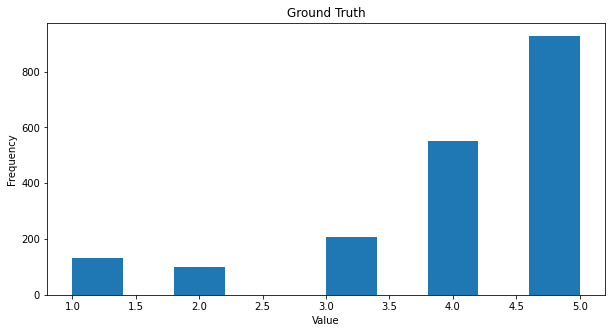

In [ ]:
#what is the distrubution in ground truth scores like?
getHistogram(df,'ratingScore', 'Ground Truth')

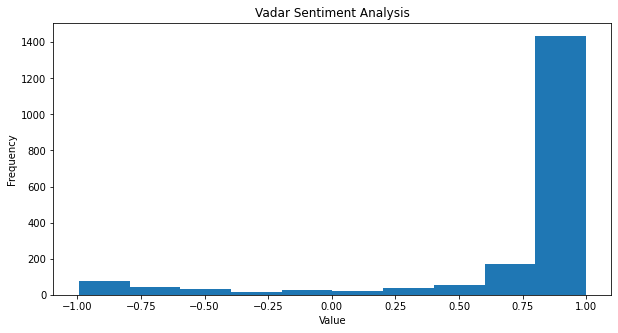

In [ ]:
# what is the distrubtuion in vader scores like?
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

There is one thing I noticed here, the vader score is near 1 for a very high no of reviews whereas the no of reviews which have a near 4-5 star rating is comparitively less.
This may be due to the fact that any rating above 4 is considered as positive and any rating below is considered as negative. Therefore the vader for more ratings is near 1 since they are considered as positive whether they are 4 or 5.

Text(0, 0.5, 'Frequency')

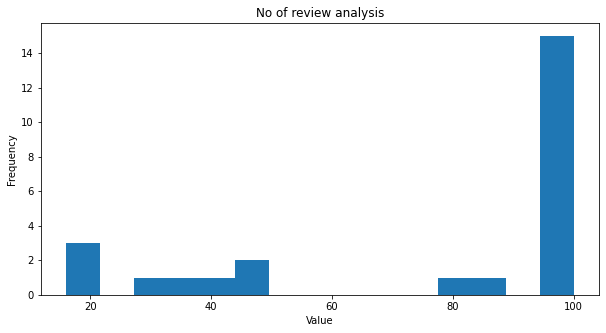

In [ ]:
plt.figure(figsize=(10,5))
plt.title('No of review analysis')
plt.hist(df['hotelName'].value_counts(), bins=15)
plt.xlabel("Value")
plt.ylabel("Frequency")

Here we can see that most of the hotels have reviews of 100. Whereas there are a few which have less than even 50 reviews. Those hotels might give less info than those which have over 50.

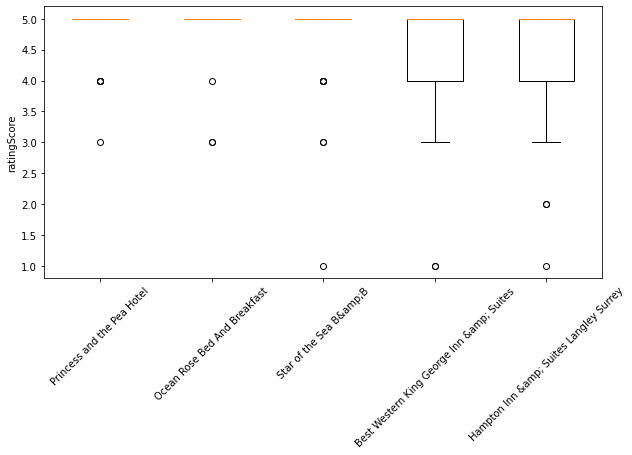

In [ ]:
top5=avgRatingTop5['hotelName'].values
ratingstop5=[]
for hotel in top5:
  ratings=df[df['hotelName']==hotel]['ratingScore'].values
  ratingstop5.append(ratings)
ratingstop5

# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(ratingstop5)
plt.xticks(np.arange(1,6), top5,rotation=45)
plt.ylabel('ratingScore')
plt.show()

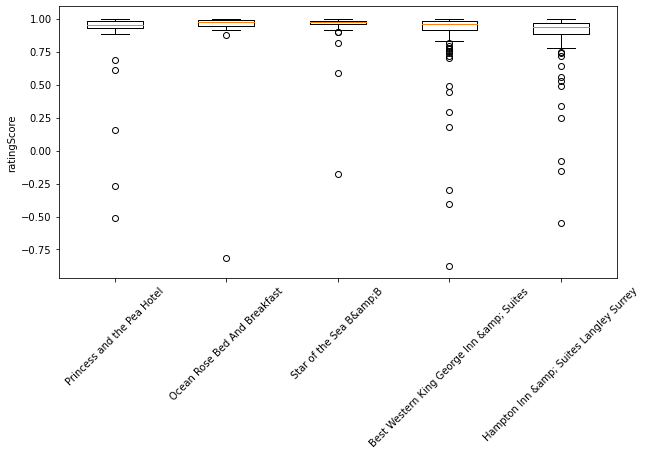

In [ ]:
top5=avgRatingTop5['hotelName'].values
ratingstop5=[]
for hotel in top5:
  ratings=finaldf[finaldf['hotelName']==hotel]['vader'].values
  ratingstop5.append(ratings)
ratingstop5

# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(ratingstop5)
plt.xticks(np.arange(1,6), top5,rotation=45)
plt.ylabel('ratingScore')
plt.show()

In [ ]:
newdf=finaldf[['hotelName','ratingScore','vader']]
newdf=newdf[newdf['hotelName'].isin(top5)]
newdf.groupby(by='hotelName',axis=0).agg(['mean', 'var'])

ratingScore  ...     vader
                                                 mean  ...       var
hotelName                                              ...          
Best Western King George Inn &amp; Suites    4.620000  ...  0.081110
Hampton Inn &amp; Suites Langley Surrey      4.560000  ...  0.057478
Ocean Rose Bed And Breakfast                 4.833333  ...  0.106805
Princess and the Pea Hotel                   4.866667  ...  0.095080
Star of the Sea B&amp;B                      4.700000  ...  0.036773

[5 rows x 4 columns]

Here we can see that the box plot is definitely more helpful since it not only gives us an idea of the mean but it also tells us about the 1st and 3rd quartile. Also it tells us about the outlier points.
For example in the top 3 hotels, we can see that the hotels have a rating of 5 for most of the reviews but just 2-3 reviews are below that points. It also tells us what ratings were outside of the scope ie. not 5. This really helps since we can know that what was the major rating that the hotel got.

Whereas the mean and variance only tell us the mean value and the variance , it gives us no idea of how many ratings got values different from the most common values, neither it gives us an idea of what rating was it. Just the variance. We do not get to know that what the actual ratings were. In box plots we get to know mean as well so it is better than just mean and variance.
It is also easier to visualize

Text(0.5, 0, 'Vader Score')

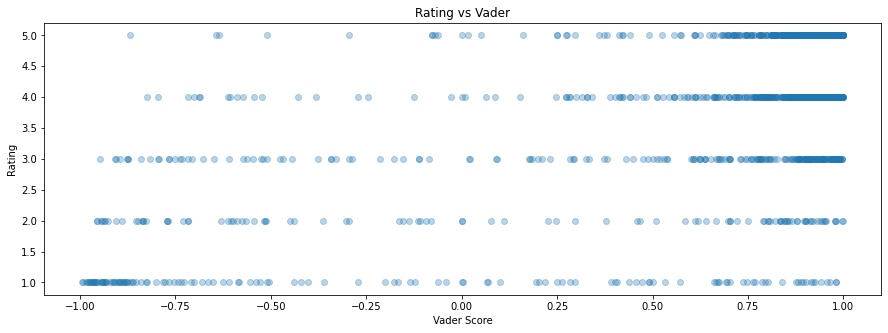

In [ ]:
plt.subplots(figsize=(15,5))
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
plt.plot(vader_scores, rating_scores,"o", alpha=0.3)

plt.title('Rating vs Vader')
plt.ylabel('Rating')
plt.xlabel('Vader Score')

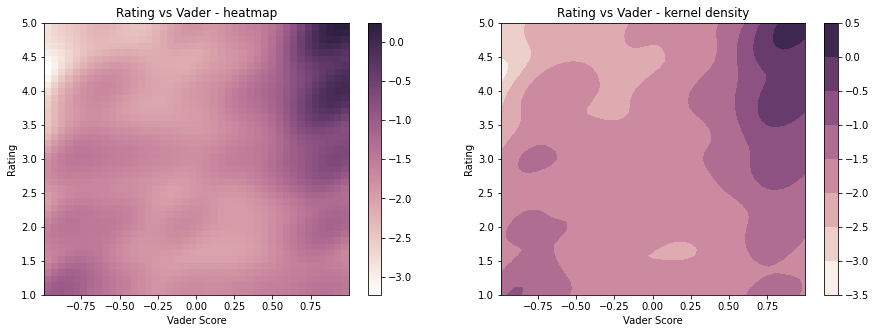

In [ ]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density');

From both these plots we get to know that the vader score is generally strongly related to the star rating. Also when the value of the star rating is 4 or 5 , the vader score is generally very near to 1. Whereas when it is less than 3, the line vader score varies alot. As the ratings go to less than 2, the vader score starts to go towards -1. This was expected since when the rating is high, the value is likely to be positive, when the rating is midway, the review can be positive or negative and when it is low, the review is negative meaning a low vader score.

In [ ]:
lenreview=finaldf['reviewCol'].str.len()

Text(0, 0.5, 'lenreview')

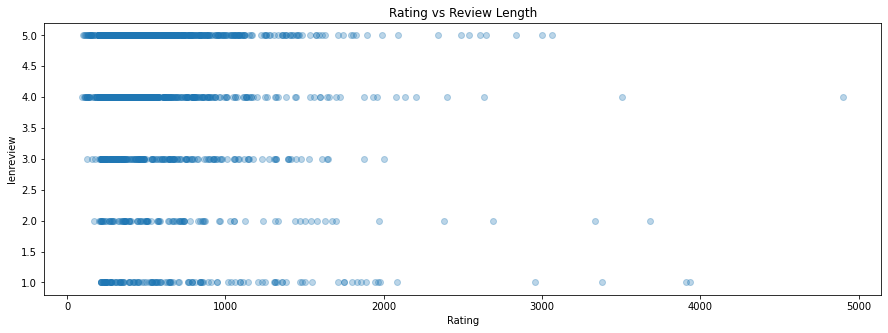

In [ ]:
plt.subplots(figsize=(15,5))

plt.plot(lenreview, rating_scores,"o", alpha=0.3)

plt.title('Rating vs Review Length')
plt.xlabel('Rating')
plt.ylabel('lenreview')

Text(0, 0.5, 'lenreview')

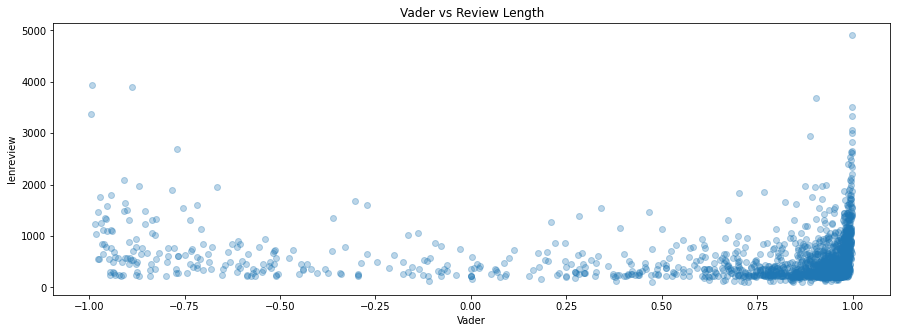

In [ ]:
plt.subplots(figsize=(15,5))

plt.plot(vader_scores,lenreview,"o", alpha=0.3)

plt.title('Vader vs Review Length')
plt.xlabel('Vader')
plt.ylabel('lenreview')

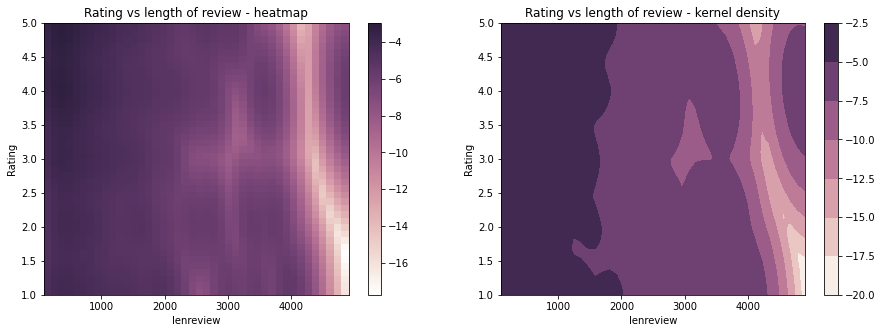

In [ ]:
k = gaussian_kde(np.vstack([lenreview, rating_scores]))
xi,yi = np.mgrid[lenreview.min():lenreview.max():lenreview.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(lenreview.min(), lenreview.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(lenreview.min(), lenreview.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('lenreview')
ax1.set_ylabel('Rating')

ax2.set_xlabel('lenreview')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs length of review - heatmap')
ax2.set_title('Rating vs length of review - kernel density');

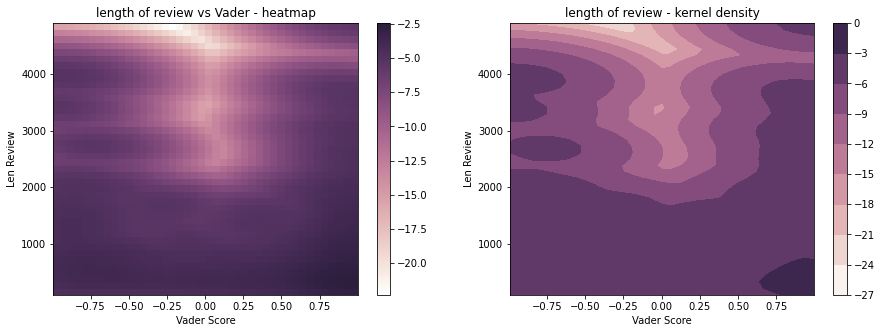

In [ ]:
k = gaussian_kde(np.vstack([vader_scores, lenreview]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,lenreview.min():lenreview.max():lenreview.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(lenreview.min(), lenreview.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(lenreview.min(), lenreview.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Len Review')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Len Review')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('length of review vs Vader - heatmap')
ax2.set_title('length of review - kernel density');

Here there is not much trend to be honest.
The length of the reviews varies for every rating.
We can see that the length of the high rated reviews varies alot and there is a dense area present throught the length of the scatter plot for rating 4-5 and for vader near 1.
For rating 3 and 2 , the avg length of reviews is slightly lower than 4 or 5 and from 1 as well.
For rating less than 2, the length again varies alot.

There cannot really be a comparison, since the low ranked hotels have less reviews and the high ranked hotels have more reviews, so there would be no clear or major output for the lower ranked hotels and they would be spread throughout.

But overall if I analyze this plot, the length of high rated reviews ie. 4 and 5 is higher than the rest of the ratings 
Also the length of reviews of vader 1 is also higher than vader score less than than

In [ ]:
df[df['hotelName'].isin(df['hotelName'].value_counts().index)].groupby(by='hotelName').mean()

,ratingScore
hotelName,
Beach Grove Motel,2.500000
Best Western King George Inn &amp; Suites,4.620000
Best Western Peace Arch Inn,3.990000
Best Western Plus Langley Inn,4.420000
Canadian Inn,2.380952
"Civic Hotel, Autograph Collection",3.844444
Coast Langley City Hotel &amp; Convention Centre,4.260000
Comfort Inn &amp; Suites Surrey,3.950000
Days Inn &amp; Suites by Wyndham Langley,4.230000


In [ ]:
df1=df['hotelName'].value_counts().reset_index()
df1=df1.rename(columns={"index": "hotelName", "hotelName": "No_of_Reviews"})
df2=finaldf.groupby(by='hotelName').mean()
df2.reset_index(inplace=True)
df2=df2[['hotelName','ratingScore','vader']]
df3=pd.merge(df1, df2, on='hotelName', how='inner')
df3


,hotelName,No_of_Reviews,ratingScore,vader
0,Best Western Plus Langley Inn,100,4.420000,0.786356
1,Comfort Inn &amp; Suites Surrey,100,3.950000,0.731879
2,Hampton Inn &amp; Suites Langley Surrey,100,4.560000,0.864635
3,Semiahmoo Resort,100,4.010000,0.694408
4,Days Inn &amp; Suites by Wyndham Langley,100,4.230000,0.774839
5,Ramada by Wyndham Surrey/Langley,100,3.810000,0.677726
6,Best Western King George Inn &amp; Suites,100,4.620000,0.870324
7,Ocean Promenade Hotel,100,3.800000,0.608122
8,Holiday Inn Express &amp; Suites Surrey,100,4.040000,0.835254
9,Coast Langley City Hotel &amp; Convention Centre,100,4.260000,0.718642


Text(0, 0.5, 'No of reviews')

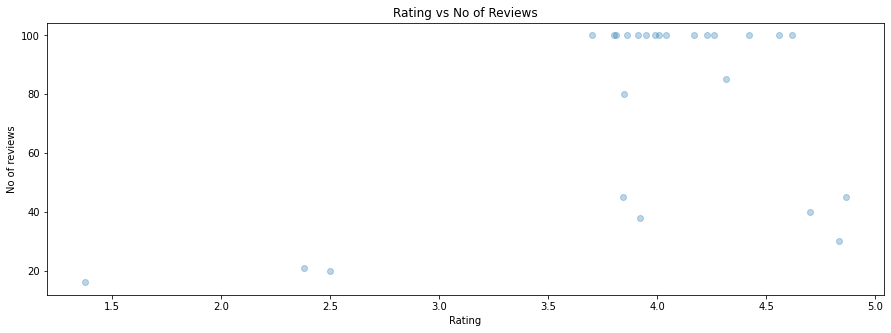

In [ ]:
plt.subplots(figsize=(15,5))

plt.plot(df3['ratingScore'],df3['No_of_Reviews'],"o", alpha=0.3)

plt.title('Rating vs No of Reviews')
plt.xlabel('Rating')
plt.ylabel('No of reviews')

Text(0, 0.5, 'No of reviews')

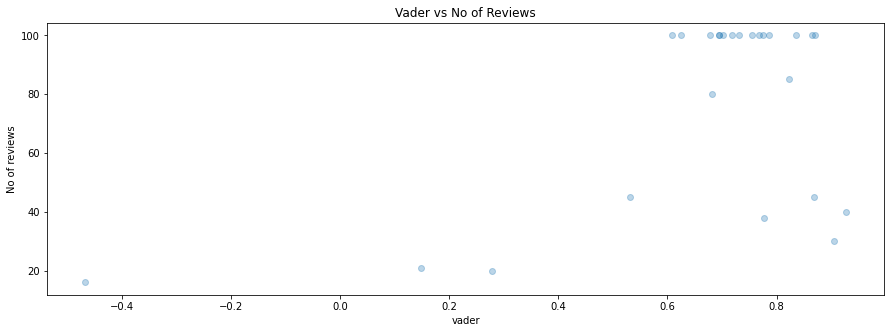

In [ ]:
plt.subplots(figsize=(15,5))

plt.plot(df3['vader'],df3['No_of_Reviews'],"o", alpha=0.3)

plt.title('Vader vs No of Reviews')
plt.xlabel('vader')
plt.ylabel('No of reviews')

From here we can clearly see that the hotels with a lower no of reviews are ranked lower and the ones with a higher no of reviews are ranked higher both in the vader score and star rating.

We can also see that hotels having reviews less than 50 are all rated below 4 and the hotels having reviews more than 50 are all rated more than 4 except a few.

In [ ]:
def make_address(row):
  # individual columns need to be combined
  return str(row['streetAddress'])+", "+str(row['City'])+", "+str(row['Province'])

In [ ]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(df.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))

geo_rating_df.reset_index(inplace=True)  
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Surrey')]['City'].fillna('Surrey'))
#geo_rating_df=geo_rating_df[geo_rating_df['Province']=='British Columbia'] 
#geo_rating_df.reset_index(drop=True,inplace=True) 
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df

,hotelName,AverageVader,AverageRatingScore,streetAddress,City,Province,postalCode,formed_address
0,Beach Grove Motel,0.277770,2.500000,5921 12 Ave,Tsawwassen,British Columbia,V4L 1C6,"5921 12 Ave, Tsawwassen, British Columbia"
1,Best Western King George Inn &amp; Suites,0.870324,4.620000,8033 King George Blvd,NaN,British Columbia,V3W 5B4,"8033 King George Blvd, nan, British Columbia"
2,Best Western Peace Arch Inn,0.702477,3.990000,2293 King George Blvd,NaN,British Columbia,V4A 5A4,"2293 King George Blvd, nan, British Columbia"
3,Best Western Plus Langley Inn,0.786356,4.420000,5978 Glover Rd,Langley City,British Columbia,V3A 4H9,"5978 Glover Rd, Langley City, British Columbia"
4,Canadian Inn,0.147757,2.380952,6528 King George Blvd,NaN,British Columbia,V3W 4Z3,"6528 King George Blvd, nan, British Columbia"
5,"Civic Hotel, Autograph Collection",0.531264,3.844444,13475 Central Ave,NaN,British Columbia,V3T 0L8,"13475 Central Ave, nan, British Columbia"
6,Coast Langley City Hotel &amp; Convention Centre,0.718642,4.260000,20393 Fraser Hwy,Langley City,British Columbia,V3A 7N2,"20393 Fraser Hwy, Langley City, British Columbia"
7,Comfort Inn &amp; Suites Surrey,0.731879,3.950000,8255 166 St,Surrey,British Columbia,V4N 5R8,"8255 166 St, Surrey, British Columbia"
8,Days Inn &amp; Suites by Wyndham Langley,0.774839,4.230000,20250 Logan Ave,Langley City,British Columbia,V3A 4L6,"20250 Logan Ave, Langley City, British Columbia"
9,Four Points by Sheraton Surrey,0.682498,3.850000,10410 158 St,Surrey,British Columbia,V4N 5C2,"10410 158 St, Surrey, British Columbia"


In [ ]:
# 0 - need to give the tool a generic name.
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)

geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Beach Grove Motel')]['point'].apply(lambda x: (49.0250139, -123.0620415, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Best Western Plus Langley Inn')]['point'].apply(lambda x: (49.1107637, -122.648172, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Civic Hotel, Autograph Collection')]['point'].apply(lambda x: (49.1904951, -122.850560, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Days Inn &amp; Suites by Wyndham Langley')]['point'].apply(lambda x: (49.1091529, -122.6641721, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Holiday Inn Express &amp; Suites Surrey')]['point'].apply(lambda x: (49.1911178, -122.7860733, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Princess and the Pea Hotel')]['point'].apply(lambda x: (49.0891039, -122.6262187, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Ramada by Wyndham Surrey/Langley')]['point'].apply(lambda x: (49.1052339, -122.6925887, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Sandman Signature Langley Hotel')]['point'].apply(lambda x: (49.1627052, -122.6677961, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Sheraton Vancouver Guildford Hotel')]['point'].apply(lambda x: (49.1919343, -122.8010988, 0.0)))
geo_rating_df.update(geo_rating_df[geo_rating_df['hotelName'].str.contains('Travelodge by Wyndham Langley')]['point'].apply(lambda x: (49.0961543, -122.62544, 0.0)))
#geo_rating_df=geo_rating_df.dropna()
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df

,hotelName,AverageVader,AverageRatingScore,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
0,Beach Grove Motel,0.277770,2.500000,5921 12 Ave,Tsawwassen,British Columbia,V4L 1C6,"5921 12 Ave, Tsawwassen, British Columbia",None,"(49.0250139, -123.0620415, 0.0)",49.025014,-123.062042,0.0
1,Best Western King George Inn &amp; Suites,0.870324,4.620000,8033 King George Blvd,NaN,British Columbia,V3W 5B4,"8033 King George Blvd, nan, British Columbia","(Best Western King George Inn & Suites, 8033, ...","(49.1487293, -122.846355, 0.0)",49.148729,-122.846355,0.0
2,Best Western Peace Arch Inn,0.702477,3.990000,2293 King George Blvd,NaN,British Columbia,V4A 5A4,"2293 King George Blvd, nan, British Columbia","(Best Western, 2293, King George Boulevard, Su...","(49.0432974, -122.79165377383993, 0.0)",49.043297,-122.791654,0.0
3,Best Western Plus Langley Inn,0.786356,4.420000,5978 Glover Rd,Langley City,British Columbia,V3A 4H9,"5978 Glover Rd, Langley City, British Columbia",None,"(49.1107637, -122.648172, 0.0)",49.110764,-122.648172,0.0
4,Canadian Inn,0.147757,2.380952,6528 King George Blvd,NaN,British Columbia,V3W 4Z3,"6528 King George Blvd, nan, British Columbia","(Canadian Inn, 6528, King George Boulevard, Pa...","(49.1213176, -122.8448415, 0.0)",49.121318,-122.844842,0.0
5,"Civic Hotel, Autograph Collection",0.531264,3.844444,13475 Central Ave,NaN,British Columbia,V3T 0L8,"13475 Central Ave, nan, British Columbia",None,"(49.1904951, -122.85056, 0.0)",49.190495,-122.850560,0.0
6,Coast Langley City Hotel &amp; Convention Centre,0.718642,4.260000,20393 Fraser Hwy,Langley City,British Columbia,V3A 7N2,"20393 Fraser Hwy, Langley City, British Columbia","(Match Eatery & Public House Langley, 20393, F...","(49.1063467, -122.6569933, 0.0)",49.106347,-122.656993,0.0
7,Comfort Inn &amp; Suites Surrey,0.731879,3.950000,8255 166 St,Surrey,British Columbia,V4N 5R8,"8255 166 St, Surrey, British Columbia","(Comfort Inn & Suites Surrey, 8255, 166 Street...","(49.15238015, -122.76216250663335, 0.0)",49.152380,-122.762163,0.0
8,Days Inn &amp; Suites by Wyndham Langley,0.774839,4.230000,20250 Logan Ave,Langley City,British Columbia,V3A 4L6,"20250 Logan Ave, Langley City, British Columbia",None,"(49.1091529, -122.6641721, 0.0)",49.109153,-122.664172,0.0
9,Four Points by Sheraton Surrey,0.682498,3.850000,10410 158 St,Surrey,British Columbia,V4N 5C2,"10410 158 St, Surrey, British Columbia","(Four Points by Sheraton Surrey, 10410, 158 St...","(49.1921242, -122.7836177, 0.0)",49.192124,-122.783618,0.0


In [ ]:
map1 = folium.Map(
    location=[49.0238454, -122.7986243], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)
geo_rating_df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], color='#d7191c').add_to(map1), axis=1)
map1

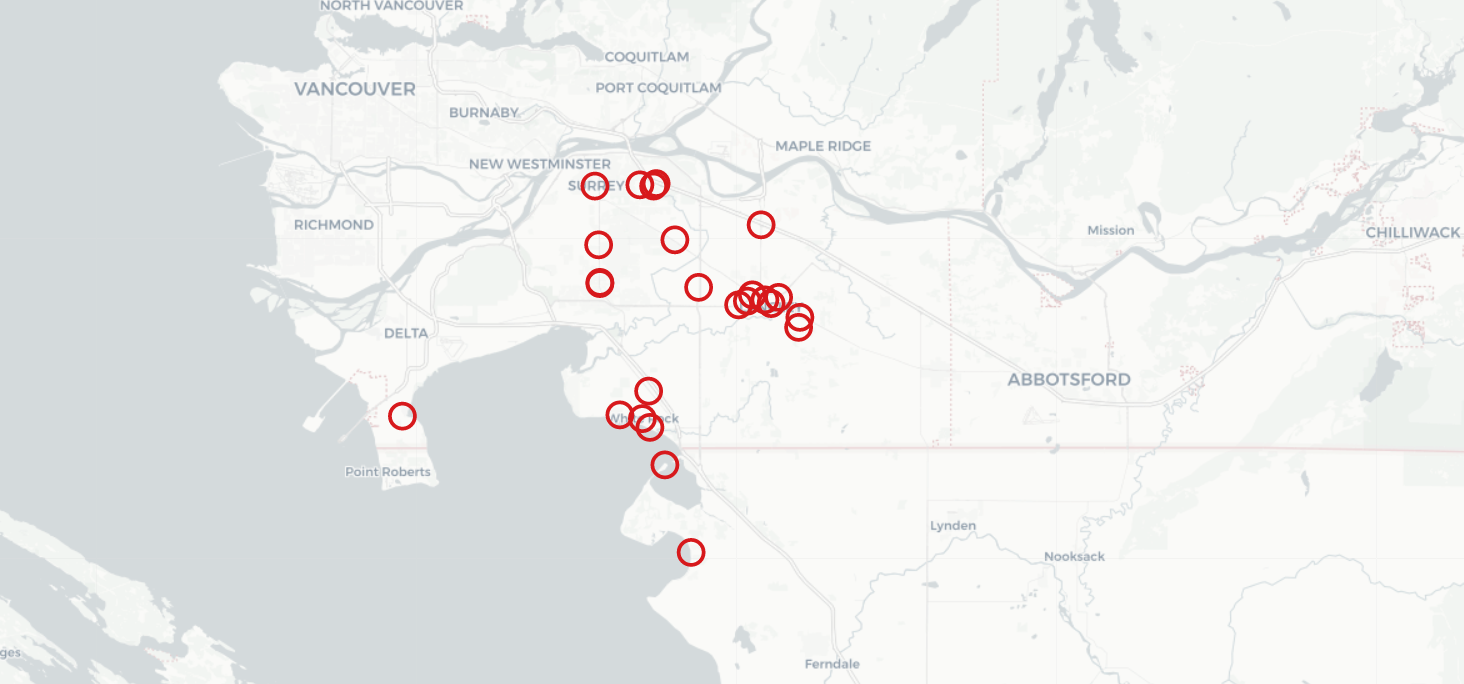

In [ ]:
## folium graphs are best saved as screenshot images to be reloaded into the notebook

from IPython.display import Image
Image('map.PNG')

In [ ]:
x=geo_rating_df['hotelName'].values
df[df['hotelName'].isin(x)]['hotelName'].value_counts()

Best Western Plus Langley Inn                              100
Comfort Inn &amp; Suites Surrey                            100
Hampton Inn &amp; Suites Langley Surrey                    100
Semiahmoo Resort                                           100
Days Inn &amp; Suites by Wyndham Langley                   100
Ramada by Wyndham Surrey/Langley                           100
Best Western King George Inn &amp; Suites                  100
Ocean Promenade Hotel                                      100
Holiday Inn Express &amp; Suites Surrey                    100
Coast Langley City Hotel &amp; Convention Centre           100
Travelodge by Wyndham Langley                              100
Sandman Signature Langley Hotel                            100
Best Western Peace Arch Inn                                100
Sheraton Vancouver Guildford Hotel                         100
Holiday Inn Hotel &amp; Suites Surrey East - Cloverdale    100
Sandcastle at Birch Bay                                

In [ ]:
avg_rating_df.reset_index(inplace=True)

In [ ]:
#Hotels near the shore
wr=geo_rating_df[geo_rating_df['City'].str.contains('White Rock')\
                 |geo_rating_df['City'].str.contains('Blaine')\
                 |geo_rating_df['City'].str.contains('Tsawwassen')\
                 |geo_rating_df['City'].str.contains('Birch Bay')]['hotelName'].values
df[df['hotelName'].isin(wr)]['hotelName'].value_counts()

Ocean Promenade Hotel           100
Semiahmoo Resort                100
Sandcastle at Birch Bay          85
Star of the Sea B&amp;B          40
Ocean Rose Bed And Breakfast     30
Beach Grove Motel                20
Name: hotelName, dtype: int64

In [ ]:
avg_rating_df[avg_rating_df['hotelName'].str.contains('Ocean Promenade Hotel')|avg_rating_df['hotelName'].str.contains('Star of the Sea B&amp;B')|avg_rating_df['hotelName'].str.contains('Ocean Rose Bed And Breakfast')\
              |avg_rating_df['hotelName'].str.contains('Ocean Rose Bed And Breakfast')\
              |avg_rating_df['hotelName'].str.contains('Beach Grove Motel')\
              |avg_rating_df['hotelName'].str.contains('Semiahmoo Resort')]

,hotelName,AverageVader,AverageRatingScore
0,Beach Grove Motel,0.277770,2.500000
14,Ocean Promenade Hotel,0.608122,3.800000
15,Ocean Rose Bed And Breakfast,0.905830,4.833333
20,Semiahmoo Resort,0.694408,4.010000
22,Star of the Sea B&amp;B,0.927210,4.700000


In [ ]:
#Hotels in Langley City
lc=geo_rating_df[geo_rating_df['City']=='Langley City']['hotelName'].values
df[df['hotelName'].isin(lc)]['hotelName'].value_counts()

Days Inn &amp; Suites by Wyndham Langley            100
Coast Langley City Hotel &amp; Convention Centre    100
Travelodge by Wyndham Langley                       100
Sandman Signature Langley Hotel                     100
Best Western Plus Langley Inn                       100
Princess and the Pea Hotel                           45
Westward Inn &amp; Suites                            38
Name: hotelName, dtype: int64

In [ ]:
avg_rating_df[avg_rating_df['hotelName'].str.contains('Days Inn &amp; Suites by Wyndham Langley')|\
              avg_rating_df['hotelName'].str.contains('Travelodge by Wyndham Langley')\
              |avg_rating_df['hotelName'].str.contains('Sandman Signature Langley Hotel')\
              |avg_rating_df['hotelName'].str.contains('Coast Langley City Hotel &amp; Convention Centre')\
              |avg_rating_df['hotelName'].str.contains('Princess and the Pea Hotel')\
              |avg_rating_df['hotelName'].str.contains('Westward Inn &amp; Suites')]

,hotelName,AverageVader,AverageRatingScore
6,Coast Langley City Hotel &amp; Convention Centre,0.718642,4.260000
8,Days Inn &amp; Suites by Wyndham Langley,0.774839,4.230000
16,Princess and the Pea Hotel,0.868393,4.866667
19,Sandman Signature Langley Hotel,0.754394,3.860000
23,Travelodge by Wyndham Langley,0.624399,3.700000
24,Westward Inn &amp; Suites,0.776647,3.921053


In [ ]:
#Hotels in Surrey City
sur=geo_rating_df[geo_rating_df['City']=='Surrey']['hotelName'].values
df[df['hotelName'].isin(sur)]['hotelName'].value_counts()

Ramada by Wyndham Surrey/Langley                           100
Holiday Inn Express &amp; Suites Surrey                    100
Hampton Inn &amp; Suites Langley Surrey                    100
Comfort Inn &amp; Suites Surrey                            100
Holiday Inn Hotel &amp; Suites Surrey East - Cloverdale    100
Four Points by Sheraton Surrey                              80
Name: hotelName, dtype: int64

In [ ]:
avg_rating_df[avg_rating_df['hotelName'].str.contains('Holiday Inn Hotel &amp; Suites Surrey East - Cloverdale')|\
              avg_rating_df['hotelName'].str.contains('Ramada by Wyndham Surrey/Langley')\
              |avg_rating_df['hotelName'].str.contains('Comfort Inn &amp; Suites Surrey')\
              |avg_rating_df['hotelName'].str.contains('Hampton Inn &amp; Suites Langley Surrey')\
              |avg_rating_df['hotelName'].str.contains('Holiday Inn Express &amp; Suites Surrey')\
              |avg_rating_df['hotelName'].str.contains('Four Points by Sheraton Surrey')]

,hotelName,AverageVader,AverageRatingScore
7,Comfort Inn &amp; Suites Surrey,0.731879,3.95
9,Four Points by Sheraton Surrey,0.682498,3.85
10,Hampton Inn &amp; Suites Langley Surrey,0.864635,4.56
11,Holiday Inn Express &amp; Suites Surrey,0.835254,4.04
12,Holiday Inn Hotel &amp; Suites Surrey East - C...,0.767950,4.17
17,Ramada by Wyndham Surrey/Langley,0.677726,3.81


Here I see that the hotels near the shores and away from the 2 cities ie Surrey and Langley city have a low no of reviews when compared to the hotels in the city. Also the their avergae vader and average rating is also not that high.
When I looked at hotels in the cities, the average ratings were also high and the vader score was also high.
This might be because close to the city , you get all amenities and people who come here might want to see the city life and maybe go 1 day for sightseeing near the sea shore. The distance from these cities is not far from the shores. Moreover surrey is a very old city and is crowded and has many eating and sightseeing places. Therefore people prefer hotels in the cities.

Whereas the hotels on the shore might not be as good and people might prefer to live in a city where all the amenities are present rather than a place where it is dull and no amenities are there.


From the results ,I would recommend staying in Langley City since it has hotels with high ratings and high vader scores. Moreover it is near to the sea shores and a person can easily drive to the shores when they want sight seeing. It is also close to the US border, so if a person wants to visit US, this is also an ideal place for him to stay.

In [ ]:
avg_rating_df.sort_values(by='AverageRatingScore',ascending=False)

,hotelName,AverageVader,AverageRatingScore
16,Princess and the Pea Hotel,0.868393,4.866667
15,Ocean Rose Bed And Breakfast,0.905830,4.833333
22,Star of the Sea B&amp;B,0.927210,4.700000
1,Best Western King George Inn &amp; Suites,0.870324,4.620000
10,Hampton Inn &amp; Suites Langley Surrey,0.864635,4.560000
3,Best Western Plus Langley Inn,0.786356,4.420000
18,Sandcastle at Birch Bay,0.821813,4.317647
6,Coast Langley City Hotel &amp; Convention Centre,0.718642,4.260000
8,Days Inn &amp; Suites by Wyndham Langley,0.774839,4.230000
12,Holiday Inn Hotel &amp; Suites Surrey East - C...,0.767950,4.170000


In [ ]:
df['hotelName'].value_counts()

Best Western Plus Langley Inn                              100
Comfort Inn &amp; Suites Surrey                            100
Hampton Inn &amp; Suites Langley Surrey                    100
Semiahmoo Resort                                           100
Days Inn &amp; Suites by Wyndham Langley                   100
Ramada by Wyndham Surrey/Langley                           100
Best Western King George Inn &amp; Suites                  100
Ocean Promenade Hotel                                      100
Holiday Inn Express &amp; Suites Surrey                    100
Coast Langley City Hotel &amp; Convention Centre           100
Travelodge by Wyndham Langley                              100
Sandman Signature Langley Hotel                            100
Best Western Peace Arch Inn                                100
Sheraton Vancouver Guildford Hotel                         100
Holiday Inn Hotel &amp; Suites Surrey East - Cloverdale    100
Sandcastle at Birch Bay                                

The hotels I select as top rated are :
1) Best Western King George Inn &amp; Suites
2)Hampton Inn &amp; Suites Langley Surrey 

The hotels I select as mediocre are :
1)Holiday Inn Express &amp; Suites Surrey
2)Semiahmoo Resort

The hotels I select as low rated are :
1)Ocean Promenade
2)Travelodge by Wyndham Langley

I have selected these since even though they are not the lowest or highest rated, but they have a large no. of reviews ie. 100

In [ ]:
six_hotels=['Best Western King George Inn &amp; Suites','Hampton Inn &amp; Suites Langley Surrey','Holiday Inn Express &amp; Suites Surrey','Semiahmoo Resort','Ocean Promenade Hotel','Travelodge by Wyndham Langley']
six_hotels

['Best Western King George Inn &amp; Suites',
 'Hampton Inn &amp; Suites Langley Surrey',
 'Holiday Inn Express &amp; Suites Surrey',
 'Semiahmoo Resort',
 'Ocean Promenade Hotel',
 'Travelodge by Wyndham Langley']

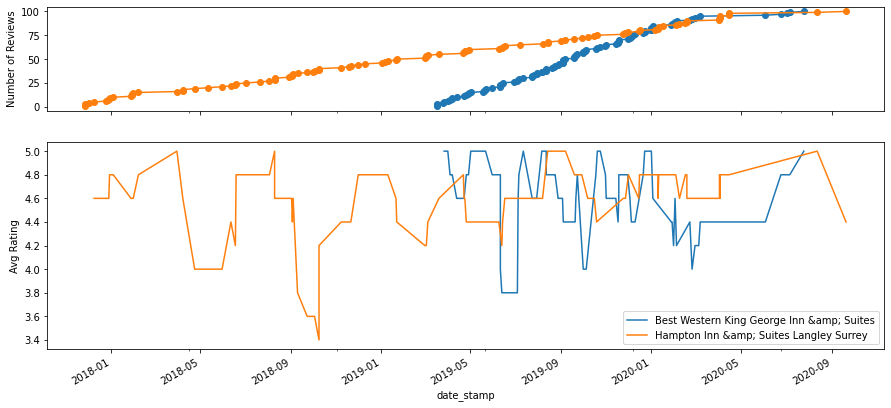

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels[:2]: 
  _df = df[df['hotelName']==hotel].set_index('date_stamp')
  for a in range(len(_df.index)):
    if 'ago' in _df.index[a-1] :
      _df.rename(index={_df.index[a-1]:'2020'},inplace=True)
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(5).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

There is fluctuation for Hampton in initially, maybe since it had just started business and was still in the learning phase,but after that we can see that the ratings were pretty constant near the 4.6-.4.8 mark

For Best Western they started business later and we can see that there is fluctuation in the ratings.

Also in 2020, we see that the no of reviews is low , hence the rating is pretty constant . This is due to no business during pandemic.

**Medium Hotels**

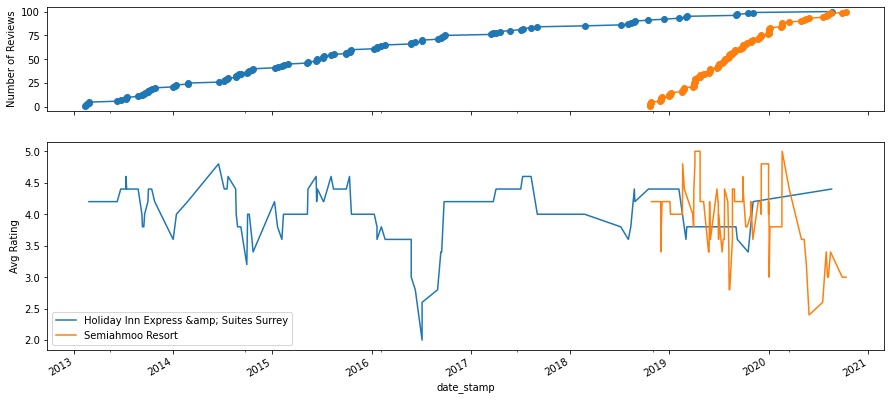

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels[2:4]: 
  _df = df[df['hotelName']==hotel].set_index('date_stamp')
  for a in range(len(_df.index)):
    if 'ago' in _df.index[a-1] :
      _df.rename(index={_df.index[a-1]:'2020'},inplace=True)
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(5).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

For these , the holiday inn fluctuated initially and rating dropped during 2016-1017 but it picked up and has been prettu constant after that.
For Semiahmoo,the rating fluctuated alot and in 2020-2021, it is starting to go down.

**Low ranked hotels**

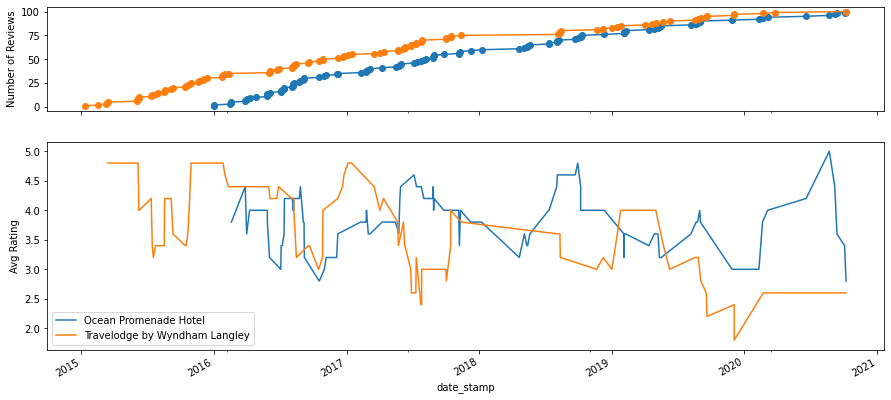

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels[4:6]: 
  _df = df[df['hotelName']==hotel].set_index('date_stamp')
  for a in range(len(_df.index)):
    if 'ago' in _df.index[a-1] :
      _df.rename(index={_df.index[a-1]:'2020'},inplace=True)
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(5).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

There is alot of fluctuation for the low ranked hotels. Specially Travelodge whose business and rating declined during the pandemic time ( 2019-2021 )

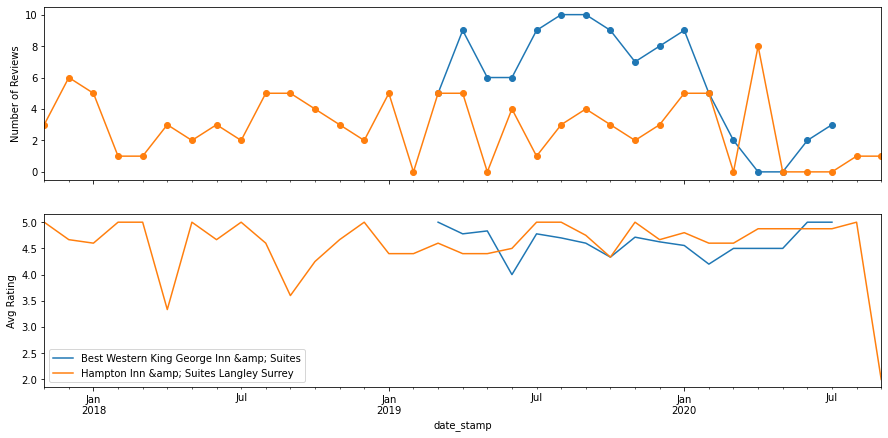

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 1]})

for hotel in six_hotels[:2]: 
  _df = df[df['hotelName']==hotel].set_index('date_stamp')
  for a in range(len(_df.index)):
    if 'ago' in _df.index[a-1] :
      _df.rename(index={_df.index[a-1]:'2020'},inplace=True)
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)
ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

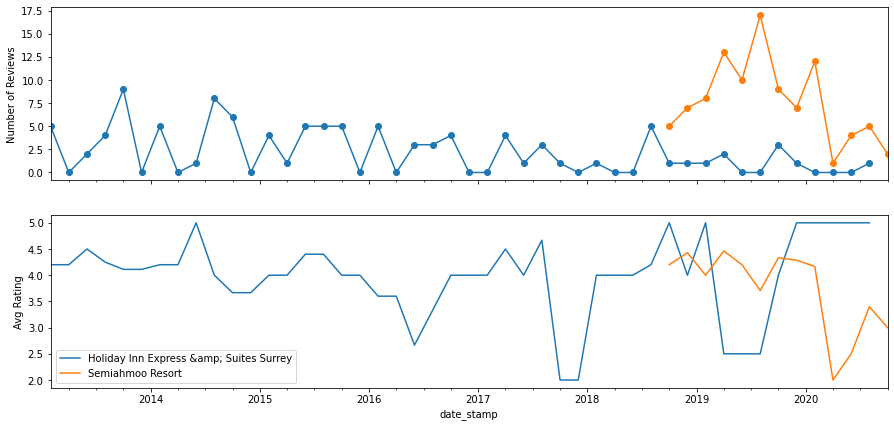

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 1]})

for hotel in six_hotels[2:4]: 
  _df = df[df['hotelName']==hotel].set_index('date_stamp')
  for a in range(len(_df.index)):
    if 'ago' in _df.index[a-1] :
      _df.rename(index={_df.index[a-1]:'2020'},inplace=True)
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='2M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)
ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

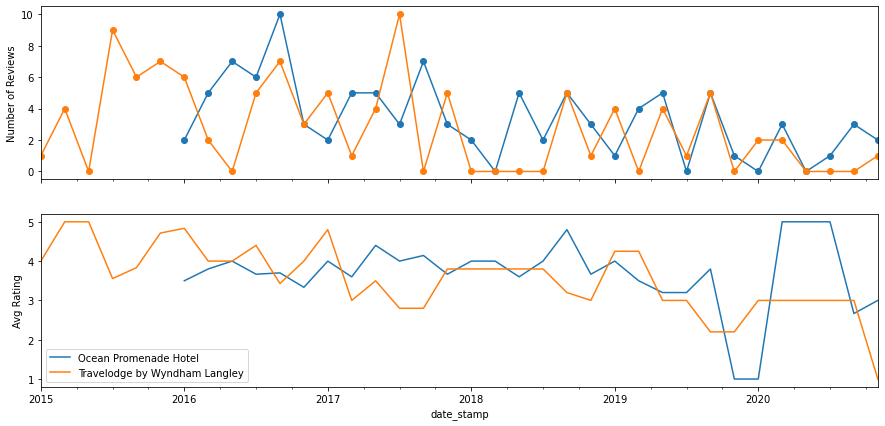

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 1]})

for hotel in six_hotels[4:6]: 
  _df = df[df['hotelName']==hotel].set_index('date_stamp')
  for a in range(len(_df.index)):
    if 'ago' in _df.index[a-1] :
      _df.rename(index={_df.index[a-1]:'2020'},inplace=True)
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='2M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)
ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

From the plots we can easily make out that , when the no of reviews is higher, the rating is also generally higher.
When the there are no reviews, like during pandemic in 2020, the rating is kept constant as the previous rating.

This is expected as well. When there are alot of reviews, the hotel becomes more noticed on the internet, hence more people travel there. When more people travel, there is higher chance of the rating going up.
Lets say if more people are travelling to the hotel, and if they give bad reviews, the hotel staff will try to work on those reviews and try to rectify the mistakes. Inturn , seeing this it will attract more customers. Hence overall even if there are some negative reviews , the rating will be higher since generally the ratings put by the customers is positive.